##Machine learning model to predict the future price of doge coin based on past data

In [3]:
#import needed modules
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('/content/DOGE-USD.csv')
print(data.head())
print('\nshape of data is ',data.shape)

         Date      Open      High       Low     Close  Adj Close     Volume
0  2014-09-17  0.000293  0.000299  0.000260  0.000268   0.000268  1463600.0
1  2014-09-18  0.000268  0.000325  0.000267  0.000298   0.000298  2215910.0
2  2014-09-19  0.000298  0.000307  0.000275  0.000277   0.000277   883563.0
3  2014-09-20  0.000276  0.000310  0.000267  0.000292   0.000292   993004.0
4  2014-09-21  0.000293  0.000299  0.000284  0.000288   0.000288   539140.0

shape of data is  (2639, 7)


In [5]:

data3=data.copy()
data3.head()

# add target variable as one day more to future

label=[]
for i in range(len(data3)):
  label.append(data3.iloc[i]['Close'])

label=label[1:len(label)]+[data3.iloc[i]['Close']]
data3['Target Close']=label
data3=data3.drop(['Adj Close'],axis=1)
print(data3.head())
print(label[:12])
print(len(data3),len(label))


         Date      Open      High       Low     Close     Volume  Target Close
0  2014-09-17  0.000293  0.000299  0.000260  0.000268  1463600.0      0.000298
1  2014-09-18  0.000268  0.000325  0.000267  0.000298  2215910.0      0.000277
2  2014-09-19  0.000298  0.000307  0.000275  0.000277   883563.0      0.000292
3  2014-09-20  0.000276  0.000310  0.000267  0.000292   993004.0      0.000288
4  2014-09-21  0.000293  0.000299  0.000284  0.000288   539140.0      0.000298
[0.000298, 0.000277, 0.000292, 0.000288, 0.000298, 0.000313, 0.000348, 0.000375, 0.000451, 0.000375, 0.000392, 0.000396]
2639 2639


In [6]:
#method to find the open,high,low,close of last n days of data

def finddata(data,n):
  open,high,low,close=[],[],[],[]

  for i in range(len(data)):
    if i <n-1:
      open.append(sum(data.iloc[:n]['Open'])/n)
      close.append(sum(data.iloc[:n]['Close'])/n)
      high.append(max(data.iloc[:n]['High']))
      low.append(min(data.iloc[:n]['Low']))

    else:
      open.append(data.iloc[i-n+1]['Open'])
      close.append(data.iloc[i]['Close'])
      high.append(max(data.iloc[i-n+1:i+1]['High']))
      low.append(min(data.iloc[i-n+1:i+1]['Low']))


  open=open[:len(data)]
  close=close[:len(data)]
  high=high[:len(data)]
  low=low[:len(data)]

  return open,close,high,low



In [7]:
#adding new columns of 7 days and 40 days data

newvals=finddata(data3,7)
newvals2=finddata(data3,40)
data3['7day_open']=newvals[0]
data3['7day_close']=newvals[1]
data3['7day_high']=newvals[2]
data3['7day_low']=newvals[3]

data3['40day_open']=newvals2[0]
data3['40day_close']=newvals2[1]
data3['40day_high']=newvals2[2]
data3['40day_low']=newvals2[3]

data3.head()

,Date,Open,High,Low,Close,Volume,Target Close,7day_open,7day_close,7day_high,7day_low,40day_open,40day_close,40day_high,40day_low
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600.0,0.000298,0.000288,0.000291,0.000325,0.00026,0.0003,0.000299,0.000467,0.000223
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910.0,0.000277,0.000288,0.000291,0.000325,0.00026,0.0003,0.000299,0.000467,0.000223
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,883563.0,0.000292,0.000288,0.000291,0.000325,0.00026,0.0003,0.000299,0.000467,0.000223
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,993004.0,0.000288,0.000288,0.000291,0.000325,0.00026,0.0003,0.000299,0.000467,0.000223
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,539140.0,0.000298,0.000288,0.000291,0.000325,0.00026,0.0003,0.000299,0.000467,0.000223


In [8]:
data3=data3.drop('Date',axis=1)

#filling null cells

cols=list(data3.columns)
print('before null removal\n')
print(data3.isnull().sum())

from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
data3=pd.DataFrame(imputer.fit_transform(data3))
print('\nafter null removal..\n')
print(data3.isnull().sum())

data3.columns=cols


before null removal

Open            4
High            4
Low             4
Close           4
Volume          4
Target Close    4
7day_open       4
7day_close      4
7day_high       4
7day_low        4
40day_open      4
40day_close     4
40day_high      4
40day_low       4
dtype: int64

after null removal..

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [10]:

train = data3[:2000]
valid = data3[2000:]

x_train = train.drop('Target Close', axis=1)
y_train = train['Target Close']
x_valid = valid.drop('Target Close', axis=1)
y_valid = valid['Target Close']

#implement linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

#predict on validation data
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

0.021100226743547043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


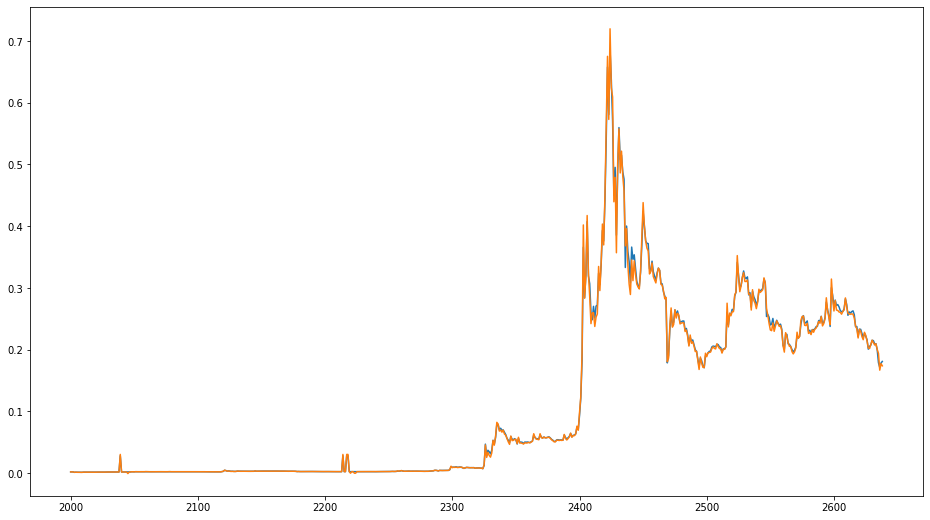

In [11]:
valid['Predictions'] = preds

plt.figure(figsize=(16,9))

plt.plot(valid[['Close','Predictions']])



In [12]:
# save model

import joblib
joblib.dump(model,'linear_model')

['linear_model']

In [14]:
data3.to_csv('data.csv',index=False)